# Workshop week 1.5: Going with the Gaussian Nutrients Flow

*[CEGM1000 MUDE](http://mude.citg.tudelft.nl/)*

*Written by: Patricia Mares Nasarre*

*Due: `<day of week>`, `<month>` `<day>`, `<year>`.*

## Part 1: Introduction and set up

blabla

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import multivariate_normal
from scipy.stats import norm
import matplotlib.pyplot as plt
from statistics import mean, stdev

In [3]:
data = np.loadtxt('S_FINO3_DIN_DIP.csv', delimiter = ',', skiprows=1)
data

array([[6.03592280e-02, 3.02578956e-06],
       [5.95290470e-02, 2.04355196e-05],
       [5.93071170e-02, 3.71527131e-05],
       ...,
       [3.25222830e-02, 2.01853000e-04],
       [3.35456130e-02, 2.09721000e-04],
       [3.53485200e-02, 2.18798000e-04]])

## Part 2: Covariance and correlation

<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

$\text{Task 2.1:}$

Plot variable X against variable Y. How do you expect the correlation to be? 
    
</p>
</div>

In [ ]:
# The code given to students can be indicated with:
# with a cell tag `assignment`.
# These cells will be removed from the solution notebook.
# The assignment notebook will be generated after a push to main and
# will be stored on the branch `assignment`.
# Places where student should write their code are marked with `### YOUR CODE HERE ###` for filling in a single line
# or with `### YOUR CODE LINES HERE` for filling in multiple lines

import numpy as np

a = [### YOUR CODE HERE ###]
    
### YOUR CODE LINES HERE

print('First 20 fibonacci numbers:', ### YOUR CODE HERE ###)

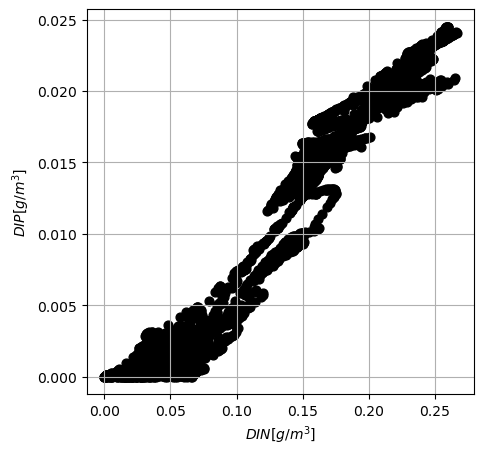

In [4]:
fig, axs = plt.subplots(1, 1)
axs.scatter(data[:,0], data[:,1], 40, 'k')
axs.set_ylabel('${DIP} [g/m^3]$')
axs.set_xlabel('${DIN} [g/m^3]$')
fig.set_size_inches(5, 5)
axs.grid()

<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

$\text{Task 2.2:}$

It looks like a relationship exists between both variables. Let's quantify it!

Define a function which calculates the covariance between two variables. The function must take as input the two vectors of observations. The output of the function must be the value for the covariance. Apply the function to the dataset to calculate the covariance between $DIN$ and $DIP$. Interpret the obtained value of the covariance.

*Important: you have to code the function yourself, do not use a prebuilt function from a package.*

*Hint: you can use the function zip to multiply two lists.*
</p>
</div>

In [ ]:
def calculate_covariance(X1, X2):
    ### YOUR CODE LINES HERE
    return covariance

print('The covariance between DIN and DIP is', ### YOUR CODE HERE ###)

In [5]:
def calculate_covariance(X1, X2):
    mean_x1 = mean(X1)
    mean_x2 = mean(X2)
    diff_x1 = [item-mean_x1 for item in X1]
    diff_x2 = [item-mean_x2 for item in X2]
    product = [a*b for a,b in zip(diff_x1,diff_x2)]
    covariance = mean(product)
    return covariance

print('The covariance between DIN and DIP is', 
      np.round(calculate_covariance(data[:,0], data[:,1]), 5))

The covariance between DIN and DIP is 0.00064


<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 90%">

$\text{Solution 2.2:}$

As expected from the visualization plot, the covariance is positive meaning that higher values of $DIN$ are related to higher values of $DIP$. The value of the covariance is very small as its units are the product of the units of random variables, which have very low values. That might trick us and make us think that the strength of the relationship between the variables is small, while the visualization indicates that the strength of the relationship is strong.

</p></div>

<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

$\text{Task 2.3:}$

Define a function which calculates Pearson's correlation coefficient between two variables. The function must take as input the two vectors of observations. The output of the function must be the value for the correlation coefficient. Apply the function to the dataset to calculate the correlation coefficient between $DIN$ and $DIP$. Interpret the obtained value of the Pearson's correlation coefficient and compare it with the obtained covariance.

</p>
</div>

In [ ]:
def pearson_correlation(X1, X2):
    covariance = calculate_covariance(X1, X2)
    correl_coeff = ### YOUR CODE HERE ###
    return correl_coeff

print("Pearson's correlation coefficient between DIN and DIP is", 
      ### YOUR CODE HERE ###)

In [6]:
def pearson_correlation(X1, X2):
    covariance = calculate_covariance(X1, X2)
    correl_coeff = covariance/(stdev(X1)*stdev(X2))
    return correl_coeff

print("Pearson's correlation coefficient between DIN and DIP is", 
      np.round(pearson_correlation(data[:,0], data[:,1]), 2))

Pearson's correlation coefficient between DIN and DIP is 0.98


<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 90%">

$\text{Solution 2.3:}$

As expected, the correlation coefficient shows a string positive relationship between $DIN$ and $DIP$. Since Pearson's correlation coefficient is dimensionless and standardized, it is easier to interpret.

</p></div>

## Part 3: Bivariate Gaussian distribution

<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

$\text{Task 3.1:}$

Model the joint distribution of $DIN$ and $DIP$ using a bivariate Gaussian distribution.
Follow the following steps:
- Define the vector of means
- Define the covariance matrix
- Define the bivariate Gaussian distribution and draw 100 samples to compare with the observations.

Do you see differences between the observations and the samples from the bivariate Gaussian distribution?
</p>
</div>

In [ ]:
# Define the vector of means
mu1 = ### YOUR CODE HERE ###
mu2 = ### YOUR CODE HERE ###

mu = [mu1, mu2] #vector of means

# Define the covariance matrix
s1 = ### YOUR CODE HERE ###
s2 = ### YOUR CODE HERE ###
covariance = ### YOUR CODE HERE ###
sigma = ### YOUR CODE HERE ###

# Draw 100 samples from a bivariate Gaussian distribution
samples = multivariate_normal(mean=mu, cov=sigma).rvs(size=100)

# Scatter plot against observations
fig, axs = plt.subplots(1, 1)
axs.scatter(data[:,0], data[:,1], 40, 'k')
axs.scatter(samples[:,0], samples[:,1], 40, 'r')
axs.set_ylabel('${DIP} [g/m^3]$')
axs.set_xlabel('${DIN} [g/m^3]$')
fig.set_size_inches(5, 5)
axs.grid()

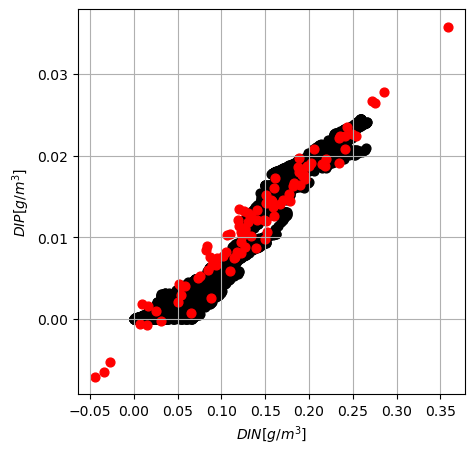

In [7]:
# Define the vector of means
mu1 = mean(data[:,0]) #mu_1
mu2 = mean(data[:,1]) #mu_2
mu = [mu1, mu2] #vector of means

# Define the covariance matrix
s1 = stdev(data[:,0])  #sigma_x1
s2 = stdev(data[:,1])  #sigma_x2
covariance = calculate_covariance(data[:,0], data[:,1]) #correlation coefficient
sigma = np.array([[s1**2 , covariance], [covariance, s2**2]]) #Covariance matrix

# Draw 100 samples from a bivariate Gaussian distribution
samples = multivariate_normal(mean=mu, cov=sigma).rvs(size=100)

# Scatter plot against observations
fig, axs = plt.subplots(1, 1)
axs.scatter(data[:,0], data[:,1], 40, 'k')
axs.scatter(samples[:,0], samples[:,1], 40, 'r')
axs.set_ylabel('${DIP} [g/m^3]$')
axs.set_xlabel('${DIN} [g/m^3]$')
fig.set_size_inches(5, 5)
axs.grid()


<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 90%">

$\text{Solution 3.1:}$

The Gaussian distribution does not present bounds, differently to other distributions such as the Lognormal distribution that it is not defined for negative values. Therefore, we obtain samples for $DIN$ and $DIP$ that are negative. Negative concentrations do not have any physical sense, being that a flaw of the bivariate Gaussian distribution as a model in this context.

</p></div>

<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

$\text{Task 3.2:}$

Using the defined bivariate Gaussian distribution, compute and plot the bivariate CDF as contours where joint probabilities are projected. This is, the x- and y-axis are the values of $DIN$ and $DIP$ and the contours in the plot represent values of joint probabilities.
</p>
</div>

In [ ]:
# Define the mesh of values where we want to evaluate the random variables
n = 200 #size of the mesh
values_DIN = np.linspace(### YOUR CODE HERE ###)
values_DIP = np.linspace(### YOUR CODE HERE ###)

# Define the grid
X1,X2 = np.meshgrid(### YOUR CODE HERE ###)
X = ### YOUR CODE HERE ###

# Evaluate the CDF
Z = ### YOUR CODE HERE ###

# Create contours plot
### YOUR CODE LINES HERE

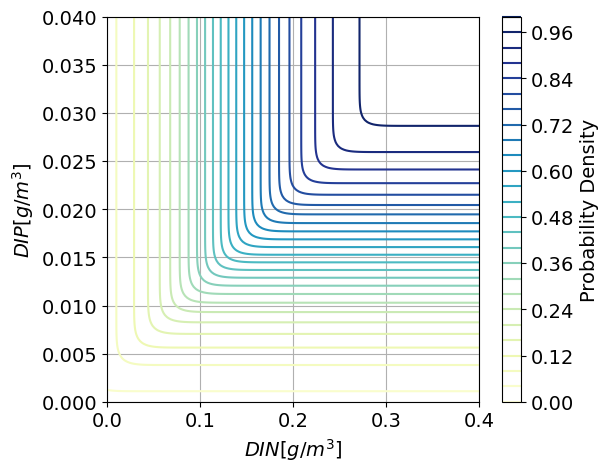

In [9]:
# Define the mesh of values where we want to evaluate the random variables
n = 200 #size of the mesh
values_DIN = np.linspace(0,mu[0]+3.8*s1,n)
values_DIP = np.linspace(0,mu[1]+3.8*s2,n)

# Define the grid
X1,X2 = np.meshgrid(values_DIN,values_DIP)
X = np.array([np.concatenate(X1.T), np.concatenate(X2.T)]).T

# Evaluate the CDF
Z = multivariate_normal(mean=mu, cov=sigma).cdf(X)

# Create contours plot
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)
contours = ax.contour(X1, X2, Z.reshape(X1.shape), 25, cmap='YlGnBu', vmin=0)
ax.grid()
ax.set_xlim([0, 0.4])
ax.set_ylim([0, 0.04])
ax.set_xlabel('${DIN} [g/m^3]$')
ax.set_ylabel('${DIP} [g/m^3]$')
fig.colorbar(contours, ax=ax, label='Probability Density')


<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

$\text{Task 3.3:}$

Using the defined bivariate Gaussian distribution, compute the following probabilities:
- $P[DIN>0.3]$
- $P[DIN \leq 0.3 \ AND \ DIP \leq 0.005]$
- $P[DIN \leq 0.3 \ OR \ DIP \leq 0.005]$
- $P[DIN > 0.3 \ AND \ DIP > 0.005]$
</p>
</div>

In [ ]:
### YOUR CODE LINES HERE

In [10]:
# probability DIN>0.3
prob_din_higher_03 = 1-norm.cdf(0.3, loc = mu1, scale = s1)
print('P[DIN>0.3]=', np.round(prob_din_higher_03, 3))

# probability DIN<0.3 and DIP<0.005
prob_joint_lower = multivariate_normal(mean=mu, cov=sigma).cdf([0.3, 0.005])
print(f'P[DIN<0.3 AND DIP<0.005]=', np.round(prob_joint_lower, 3))

#probability DIN<0.3 or DIP<0.005
prob_din_lower_03 = norm.cdf(0.3, loc = mu1, scale = s1)
prob_dip_lower_0005 = norm.cdf(0.005, loc = mu2, scale = s2)
prob_or_lower = prob_din_lower_03 + prob_dip_lower_0005 - prob_joint_lower
print(f'P[DIN<0.3 OR DIP<0.005]=', np.round(prob_or_lower, 3))

#probability DIN>0.3 and DIP>0.005
prob_joint_upper = 1- prob_din_lower_03 - prob_dip_lower_0005 + prob_joint_lower
print(f'P[DIN>0.3 AND DIP>0.005]=', np.round(prob_joint_upper, 3))


P[DIN>0.3]= 0.024
P[DIN<0.3 AND DIP<0.005]= 0.175
P[DIN<0.3 OR DIP<0.005]= 0.976
P[DIN>0.3 AND DIP>0.005]= 0.024


## Part 4: Conditionalizing the Bivariate Gaussian distribution

<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

$\text{Task 4.1:}$

Compute the distribution of DIP, given that the value of DIN = 0.05. Plot the PDFs for both the unconditional distribution of DIP and the conditionalized distribution of DIP.

Compute the parameters of the conditional distribution of DIP using pen and paper and make use of the properties of the Gaussian distribution.
</p>
</div>

<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 90%">

$\text{Solution 4.1:}$



</p></div>

<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 90%">
<p>
End of solution.
</p>
</div>

Cells containing a solution block (with color ` #FAE99E`) will be removed in the assignment notebook.

<div style="background-color:#facb8e; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 90%"> <p>

$\text{Tip:}$

Don't use the CSS danger/warning blocks because they don't display when converting to HTML with pandoc (won't display right on course files on website).
</p></div>

## Part `2, ...`

<div style="margin-top: 50px; padding-top: 20px; border-top: 1px solid #ccc;">
  <div style="display: flex; justify-content: flex-end; gap: 20px; align-items: center;">
    <a rel="MUDE" href="http://mude.citg.tudelft.nl/">
      <img alt="MUDE" style="width:100px; height:auto;" src="https://gitlab.tudelft.nl/mude/public/-/raw/main/mude-logo/MUDE_Logo-small.png" />
    </a>
    <a rel="TU Delft" href="https://www.tudelft.nl/en/ceg">
      <img alt="TU Delft" style="width:100px; height:auto;" src="https://gitlab.tudelft.nl/mude/public/-/raw/main/tu-logo/TU_P1_full-color.png" />
    </a>
    <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">
      <img alt="Creative Commons License" style="width:88px; height:auto;" src="https://i.creativecommons.org/l/by/4.0/88x31.png" />
    </a>
  </div>
  <div style="font-size: 75%; margin-top: 10px; text-align: right;">
    &copy; Copyright 2025 <a rel="MUDE" href="http://mude.citg.tudelft.nl/">MUDE</a> TU Delft. 
    This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">CC BY 4.0 License</a>.
  </div>
</div>